# Домашняя работа №1

In [112]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math
from numpy import linalg as LA

from matplotlib import pyplot as plt
from scipy import linalg


from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

In [2]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

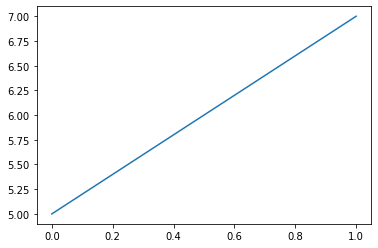

In [31]:
c = x+(2*y)+(3*z)
c
plt.plot(c)

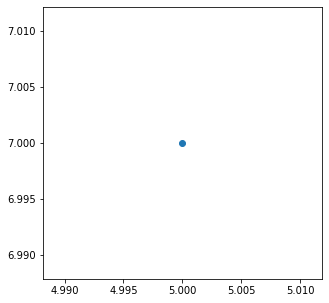

In [25]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(c[0], c[1])

In [ ]:
x = np.array([1,1])
y = np.array([2, 0])
z = np.array([0,2])

In [72]:
np.dot(x,y)
amag = np.linalg.norm(x)
amag2 = np.linalg.norm(y)
# print(amag, amag2)

cosangle = np.dot(x,y) / (np.linalg.norm(x) *np.linalg.norm(y))
# cosangle #косинус угла
angle = np.arccos(cosangle) 
a  = angle * 180/np.pi #сам угол
print(f'Угол между векторами x и y равен: {a:.0f} градусов')

Угол между векторами x и y равен: 45 градусов


In [77]:
np.dot(y,z)
amag3 = np.linalg.norm(y)
amag4 = np.linalg.norm(z) 
# print(amag, amag2)

cosangle = np.dot(y,z) / (np.linalg.norm(y) *np.linalg.norm(z))
# cosangle #косинус угла
angle = np.arccos(cosangle) 
a  = angle * 180/np.pi #сам угол
print(f'Угол между векторами y и z равен: {a:.0f} градусов')

Угол между векторами y и z равен: 90 градусов


(-1, 4)

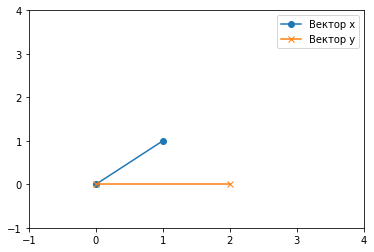

In [75]:
plt.plot([0,x[0]],[0,x[1]],'-o')
plt.plot([0,y[0]],[0,y[1]],'-x')
plt.gca()
plt.legend(['Вектор x','Вектор y'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

(-1, 4)

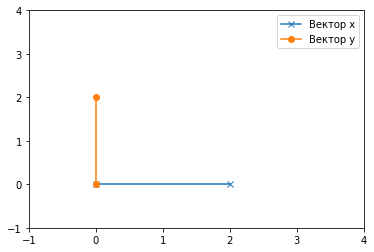

In [76]:
plt.plot([0,y[0]],[0,y[1]],'-x')
plt.plot([0,z[0]],[0,z[1]],'-o')
plt.gca()
plt.legend(['Вектор x','Вектор y'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [83]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])
df

,type,x,y,z
21,v,-0.392414,0.045288,0.025403
20,v,-0.283883,0.219551,-0.024912
19,v,-0.163721,0.476657,-0.030335
18,v,-0.163721,0.476657,-0.030335
17,v,-0.163721,0.476657,-0.030335
7,v,-0.105431,-0.412672,-0.015059
8,v,-0.103304,-0.748699,-0.045038
22,v,-0.093564,-0.046249,-0.012199
5,v,-0.093564,-0.046249,-0.012199
6,v,-0.093564,-0.046249,-0.012199


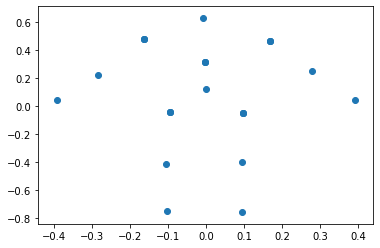

In [84]:
plt.scatter(df.x, df.y)

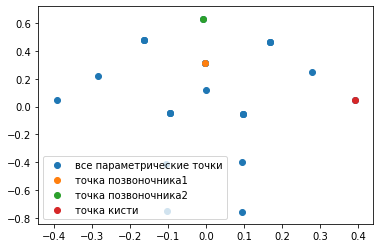

In [95]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[9], df.y[9])
plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка позвоночника1', 'точка позвоночника2', 'точка кисти'])

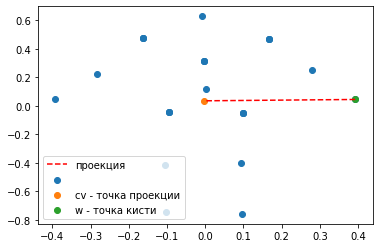

In [110]:
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]]) #вектор позвоночника
v
w = np.array([df.x[16],df.y[16]]) #вектор кисти
w
# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v
cv
# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'w - точка кисти'])

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [116]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [119]:
e_vals, e_vecs = LA.eig(m1)
print('Исходная матрица: \n', m1)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[2 2]
 [1 3]]
Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [120]:
e_vals, e_vecs = LA.eig(m2)
print('Исходная матрица: \n', m2)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4  1 -1]
 [ 1  4 -1]
 [-1 -1  4]]
Собственные вектора: 
 [[-0.81649658  0.57735027 -0.27658128]
 [ 0.40824829  0.57735027  0.8035929 ]
 [-0.40824829 -0.57735027  0.52701162]]
Собственные значения:  [3. 6. 3.]


### Буду рада подробной обратной связи
к заданию 1 про углы, можно привети пример как нарисовать дугу между векторами, и можно ли еще как то посчитать по другому кгол между векторами ?
